In [1]:
# Admission_Predict_Ver1.1
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [4]:
raw_data = pd.read_csv('Admission_Predict_Ver1.1.csv')
raw_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [5]:
print('Number of null values in each column')
raw_data.isnull().sum()

Number of null values in each column


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
def split_for_validation(a,n):
    '''
    a = dataframe,
    n = percentage of split
    '''
    return a[: len(a) - (int(len(a) * n))].copy(), a[len(a) - (int(len(a) * n)):].copy()  

In [14]:
def rand_forest_regressor(raw_data, validation_split):
    feature_columns = raw_data.iloc[:,:-1].values
    dependent_column = raw_data.iloc[:,-1].values
    X_train, X_valid = split_for_validation(a = feature_columns,
                                            n = validation_split)
    y_train, y_valid = split_for_validation(a = dependent_column,
                                            n = validation_split)
    print('Training data: ', X_train.shape, y_train.shape)
    print('Validation data: ', X_valid.shape, y_valid.shape)

    m = RandomForestRegressor(n_jobs=-1)
    m.fit(X_train, y_train)

    predTree = m.predict(X_valid)
    print()
    print('Training accuracy: ', round((m.score(X_train, y_train))*100,2),'%')
    print()
    print('Validation accuracy: ', round((m.score(X_valid, y_valid))*100,2),'%')

    
    plt.figure(figsize=(10,6))
    plt.scatter(x = list(range(len(y_valid))), y = y_valid, marker = 'X')
    plt.scatter(x = list(range(len(predTree))), y = predTree, marker = '^')
    plt.xlabel('Series')
    plt.ylabel('Chances of admission')
    plt.legend(['Actual value', 'Predicted value'])
    plt.title('Scatter plot to compare results of actual and predicted value for validation dataset')
    plt.show()
    
    plt.figure(figsize=(10,6))
    plt.plot(abs(predTree - y_valid), marker = '^', c = 'g')
    plt.xlabel('Series')
    plt.ylabel('Chances of admission')
    plt.legend(['Absolute difference between predicted and actual value'])
    plt.title('Plot absolute difference of actual and predicted value for validation dataset')
    plt.show()
    

Training data:  (400, 8) (400,)
Validation data:  (100, 8) (100,)

Training accuracy:  97.66 %

Validation accuracy:  80.63 %


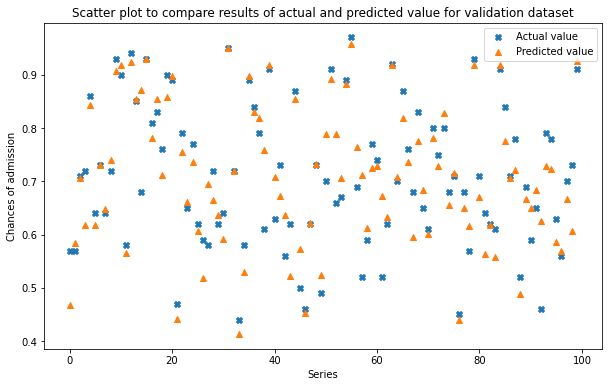

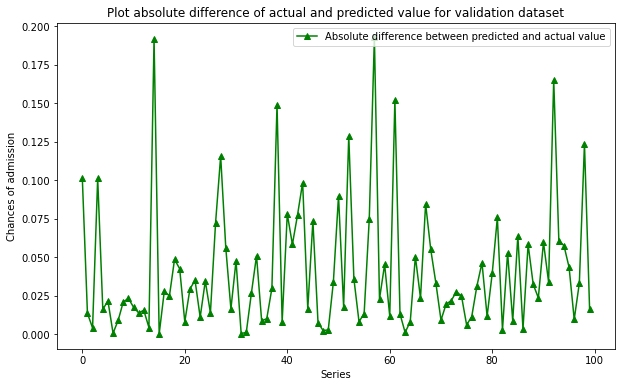

In [15]:
raw_data = shuffle(raw_data)
rand_forest_regressor(raw_data = raw_data,
                       validation_split = 0.2)